In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv('MCI_2014_to_2019.csv',sep=',')
df['Total'] = 1
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001.0,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002.0,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003.0,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004.0,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005.0,1


Data Visualisation

Plotting bargraph for Major Crime Indicators

MCI
Assault            52023
Auto Theft          6685
Break and Enter    20507
Robbery            10730
Theft Over          3036
dtype: int64


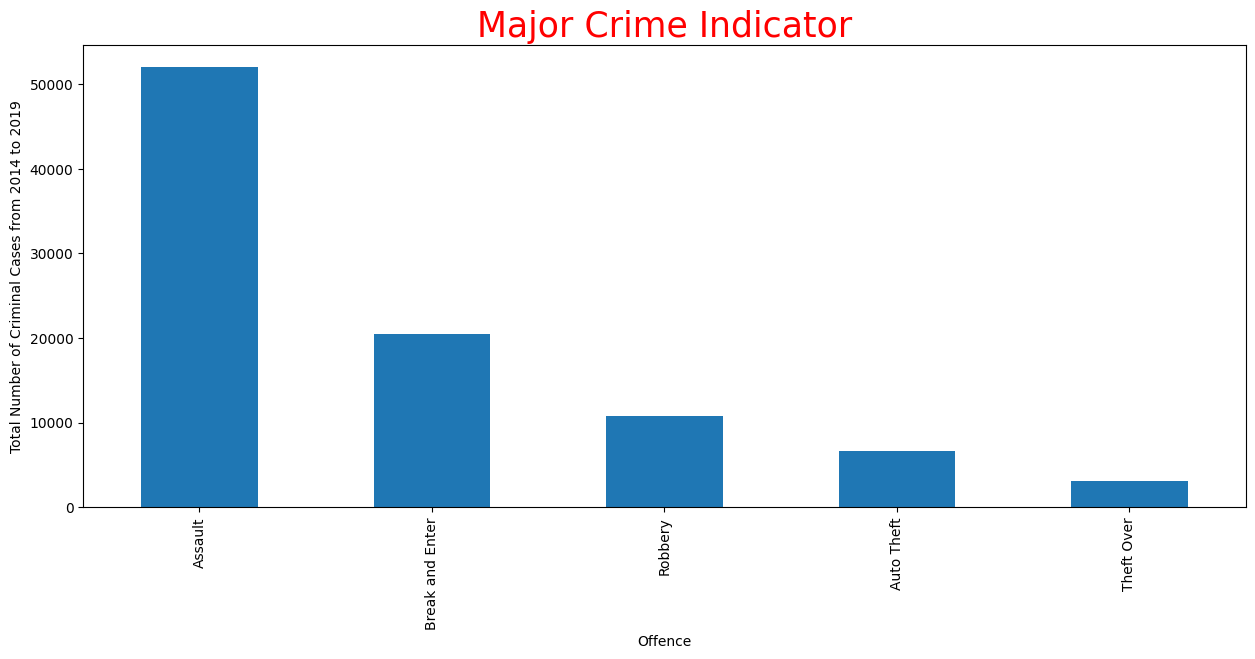

In [ ]:
major_crime_indicator = df.groupby('MCI').size()
print(major_crime_indicator)

plt.subplots(figsize = (15, 6))
ct = major_crime_indicator.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Major Crime Indicator',color = 'red',fontsize=25)
plt.show()

occurrenceyear
2014.0    31551
2015.0    31981
2016.0    14685
2017.0    13922
dtype: int64


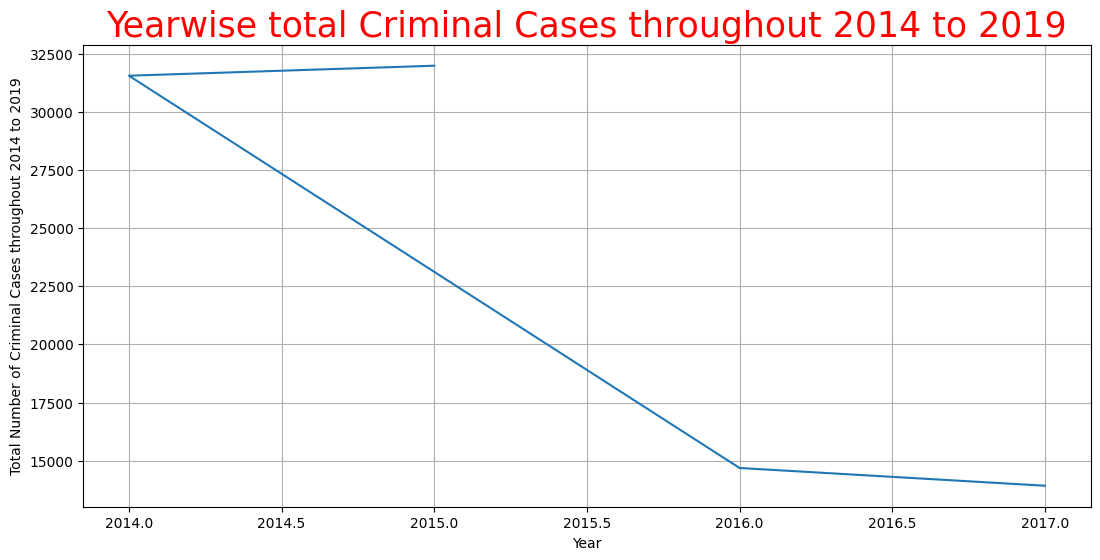

In [ ]:
# Creating a Countplot
df2 = df[df['occurrenceyear'] > 2013]
yearwise_total_crime = df2.groupby('occurrenceyear').size()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2014 to 2019')
ax.set_title('Yearwise total Criminal Cases throughout 2014 to 2019',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

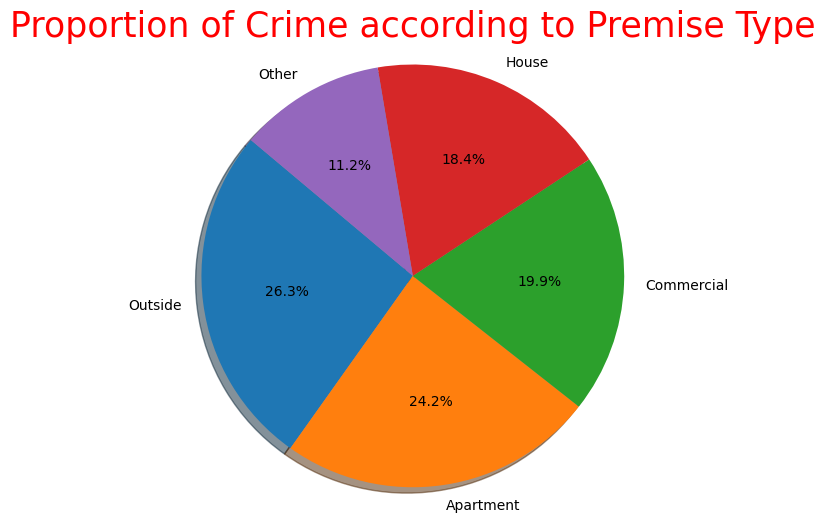

In [ ]:
# Proportion of crime according to premisetype
premise_type = df.groupby('premisetype').size()
premise_type.head()
labels = ['Outside','Apartment','Commercial','House','Other']
count = [54253,49996,41081,37927,23178]
explode = (0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Crime according to Premise Type", color='red', fontsize=25)
plt.show()

Plotting Bar graph for assault crimes in toronto

offence
Administering Noxious Thing         145
Aggravated Aslt Peace Officer         6
Aggravated Assault                  924
Aggravated Assault Avails Pros        9
Air Gun Or Pistol: Bodily Harm       11
Assault                           35840
Assault - Force/Thrt/Impede         130
Assault - Resist/ Prevent Seiz     1108
Assault Bodily Harm                2560
Assault Peace Officer              1521
Assault Peace Officer Wpn/Cbh       113
Assault With Weapon                8326
Crim Negligence Bodily Harm          42
Disarming Peace/Public Officer       31
Discharge Firearm - Recklessly      330
Discharge Firearm With Intent       553
Pointing A Firearm                  309
Set/Place Trap/Intend Death/Bh        1
Traps Likely Cause Bodily Harm        1
Unlawfully Causing Bodily Harm        5
Use Firearm / Immit Commit Off       58
dtype: int64


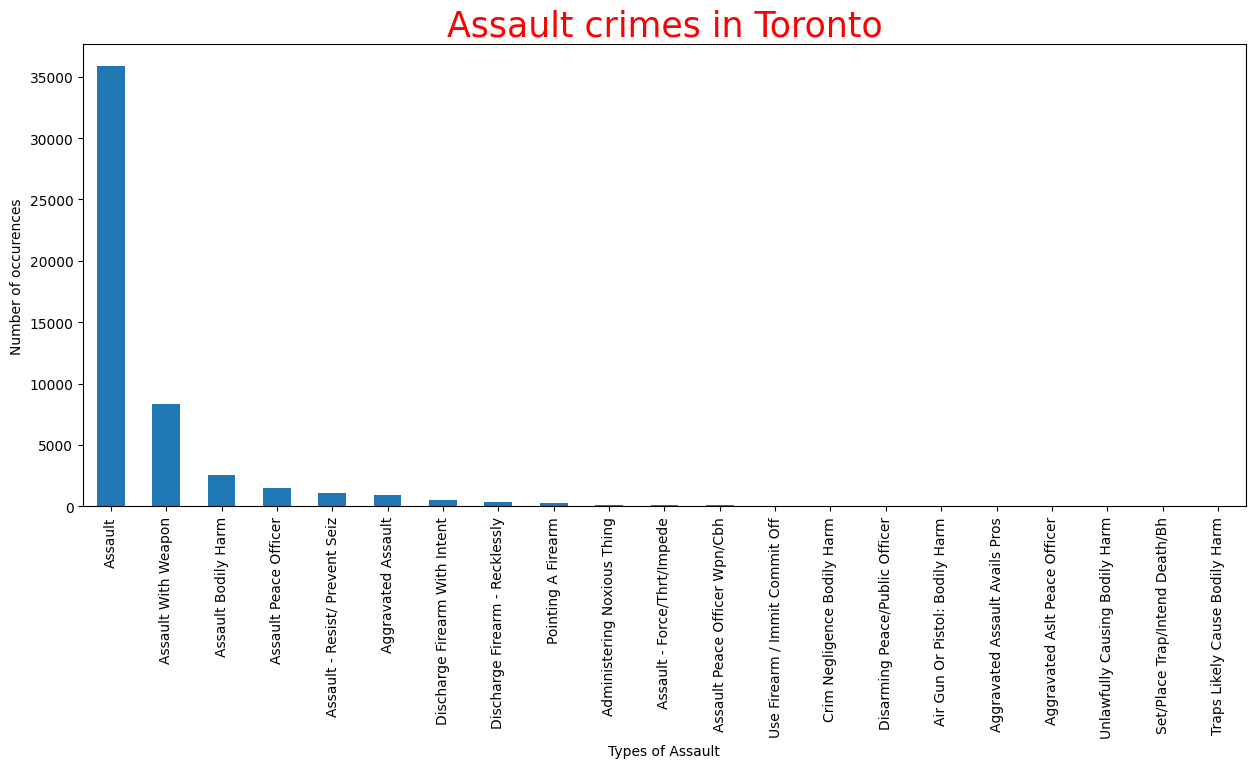

In [ ]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence').size()
print(assault_types)

plt.subplots(figsize = (15, 6))
ct = assault_types.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurences')
ax.set_title('Assault crimes in Toronto',color = 'red',fontsize=25)
plt.show()

Plotting line graph for crime types by hour of day

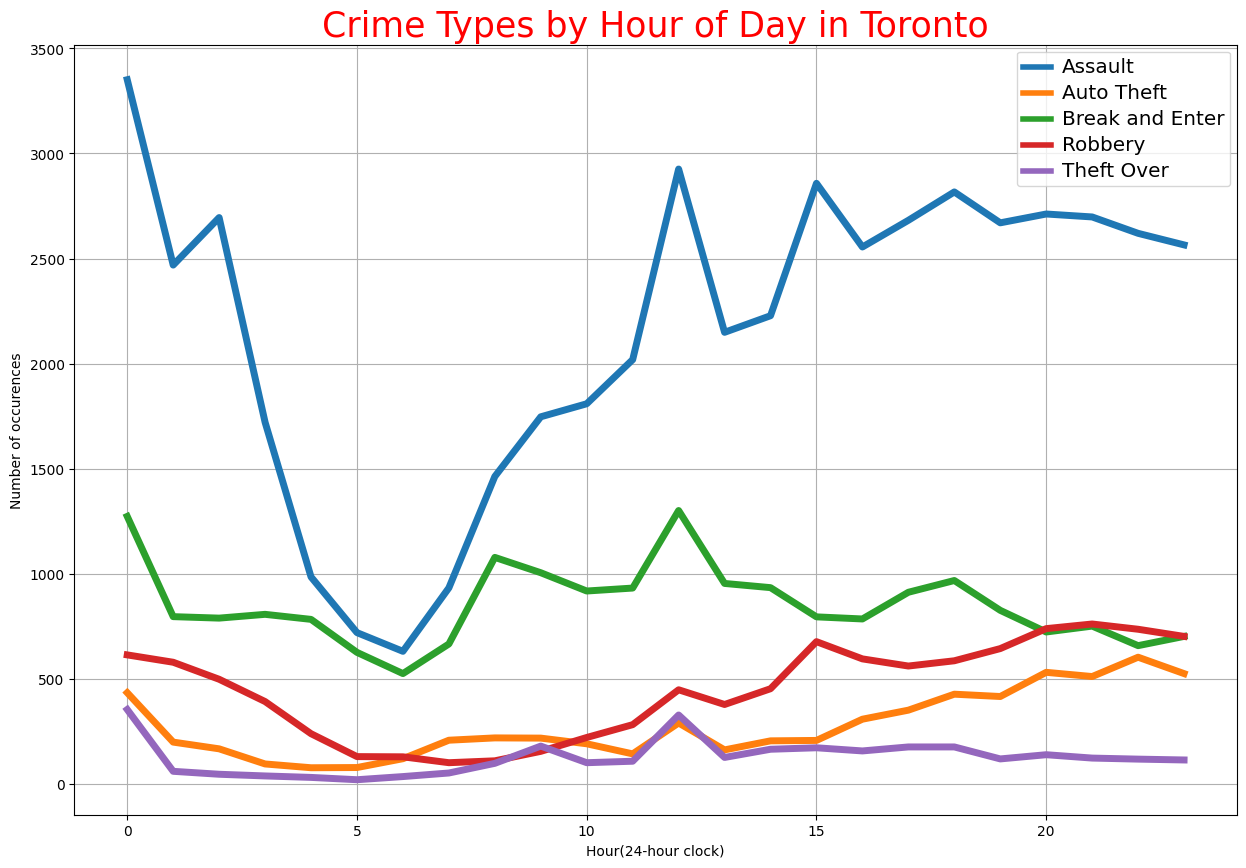

In [ ]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
#print(hour_crime_group)

fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour(24-hour clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hour_crime_group.groupby('MCI')['MCI']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

Plotting bar graph for Neighbourhoods with most crimes Top 20

Neighbourhood
Waterfront Communities-The Island (77)    3425
Bay Street Corridor (76)                  2943
Church-Yonge Corridor (75)                2577
West Humber-Clairville (1)                2295
Moss Park (73)                            2022
Woburn (137)                              1796
Downsview-Roding-CFB (26)                 1761
York University Heights (27)              1759
Kensington-Chinatown (78)                 1608
West Hill (136)                           1605
Islington-City Centre West (14)           1451
Clairlea-Birchmount (120)                 1308
Annex (95)                                1300
Glenfield-Jane Heights (25)               1267
Mount Olive-Silverstone-Jamestown (2)     1252
South Riverdale (70)                      1191
Bendale (127)                             1181
Niagara (82)                              1159
Malvern (132)                             1147
Wexford/Maryvale (119)                    1120
dtype: int64


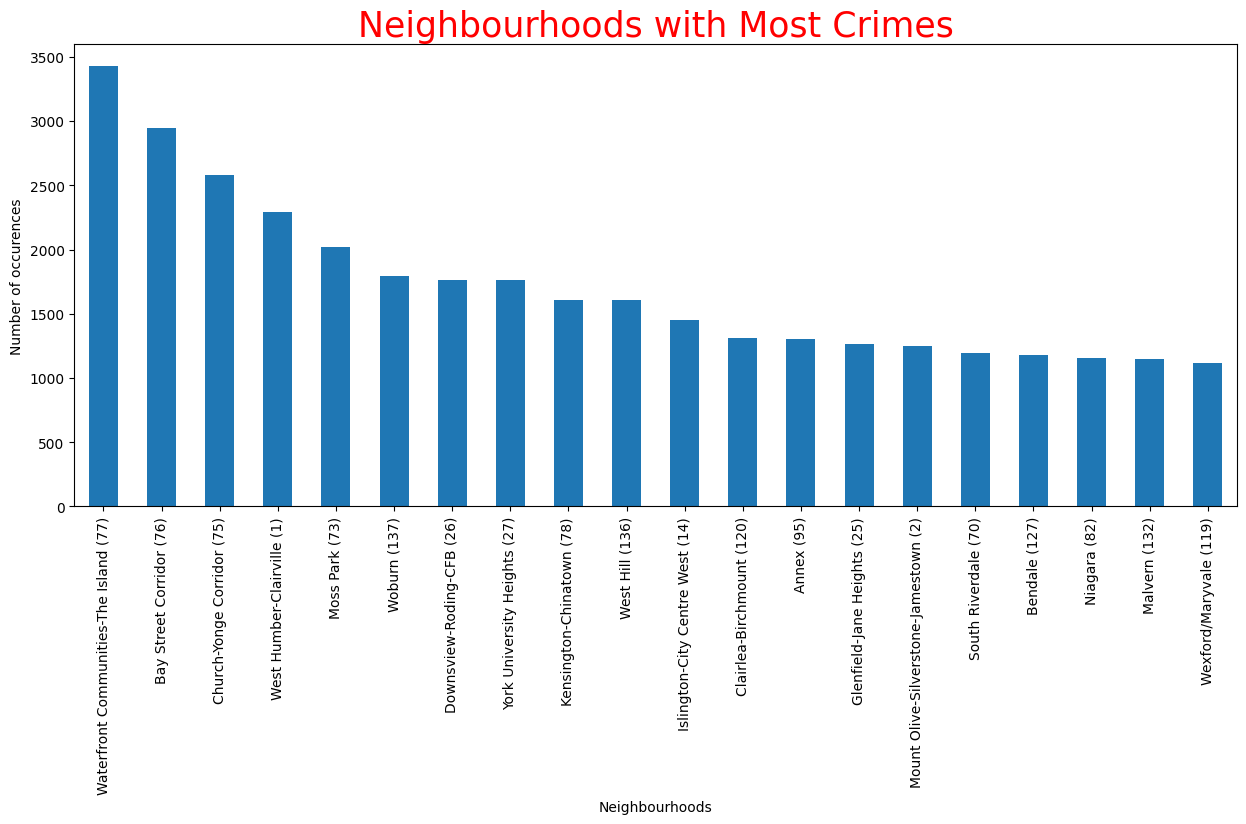

In [ ]:
location_group = df.groupby('Neighbourhood').size().sort_values(ascending = False).head(20)
print(location_group)

plt.subplots(figsize = (15, 6))
ct = location_group.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of occurences')
ax.set_title('Neighbourhoods with Most Crimes',color = 'red',fontsize=25)
plt.show()

Data Preprocessing


In [ ]:
# Columns for the models
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

# New dataframe from columns
df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1]

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1]

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1]

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1]

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1]

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1]

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1]

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

Splitting the dataset into training and tests set

In [ ]:
#set X and Y:
X = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values

#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

#need to OneHotEncode all the X variables for input into the classification model:
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Crime Predictions:-
Predicting the type of major crime committed based on time of day, neighbourhood, division, year, month, etc.



In [ ]:
# Numeric Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest :  0.6444540915997395
[[11086  1157   400    22   264]
 [ 2607  2350    33    24    68]
 [ 1458   112   935     5   128]
 [  507   168    22     8    29]
 [  838   235   107     6   466]]
                 precision    recall  f1-score   support

        Assault       0.67      0.86      0.75     12929
Break and Enter       0.58      0.46      0.52      5082
        Robbery       0.62      0.35      0.45      2638
     Theft Over       0.12      0.01      0.02       734
     Auto Theft       0.49      0.28      0.36      1652

       accuracy                           0.64     23035
      macro avg       0.50      0.39      0.42     23035
   weighted avg       0.62      0.64      0.61     23035



In [ ]:
#One Hot Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH))
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.6444540915997395
[[11425   980   322     8   194]
 [ 2538  2466    17    15    46]
 [ 1521   116   896     1   104]
 [  525   162    13     8    26]
 [  874   201    95     7   475]]
                 precision    recall  f1-score   support

        Assault       0.68      0.88      0.77     12929
Break and Enter       0.63      0.49      0.55      5082
        Robbery       0.67      0.34      0.45      2638
     Theft Over       0.21      0.01      0.02       734
     Auto Theft       0.56      0.29      0.38      1652

       accuracy                           0.66     23035
      macro avg       0.55      0.40      0.43     23035
   weighted avg       0.64      0.66      0.63     23035



In [ ]:
#Balanced Class Weight doesn't make a big difference for results:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest with Balanced class weight: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest with Balanced class weight:  0.6408074668981983
[[11141  1121   414    25   228]
 [ 2727  2236    29    28    62]
 [ 1473   109   925     5   126]
 [  495   181    20     8    30]
 [  868   238    88     7   451]]
                 precision    recall  f1-score   support

        Assault       0.67      0.86      0.75     12929
Break and Enter       0.58      0.44      0.50      5082
        Robbery       0.63      0.35      0.45      2638
     Theft Over       0.11      0.01      0.02       734
     Auto Theft       0.50      0.27      0.35      1652

       accuracy                           0.64     23035
      macro avg       0.50      0.39      0.41     23035
   weighted avg       0.61      0.64      0.61     23035

